# SIT742: Modern Data Science 
**(2020 Assessment Task 02: Exploration FIFA2019 Data)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use, change and distribute this package.

Prepared by **SIT742 Teaching Team**


---

<div class="alert alert-block alert-info">
Enter your information in the following cell. Please make sure you fill your Student ID and Name correctly.  
</div>

**Student Group Information:** Please fill your information below

- Names with Student IDs:  
- Group ID:  
- Emails:   

---

## Overview

Recently, [Kaggle](https://www.kaggle.com) (a data science community and competition platform) released one data set '[FIFA19](https://www.kaggle.com/karangadiya/fifa19)‘, which consists of 18K+ FIFA 19 player with around 90 attributes extracted from FIFA database. In this assessment task, we make it available as the data set:
- [2020T2Data.csv](https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/2020T2Data.csv): The data set for this assignment task.

In this task, you will need to **use Spark packages**

- **Part 1**: Exploratory Data Analysis

- **Part 2**: Clustering Analysis, and identify the position profiles of each cluster

- **Part 3**: Classification Analysis, and evaluate the performance of different algorithms using cross validation;


You will be required to complete the coding to answer the questions with a neat and clean format, and your commenting and adherence to code standards will be considered when marking. Further information on Python standards, please visit https://www.python.org/dev/peps/pep-0008/ 


**Note**: You are not necessary to stick to the partial code provided, and you can write your own complete code to implement the required tasks. But you should provide sufficient comments.



## Part 1 - What we could know about FIFA 2019 Players? 

### 1.0. Libraries and data files
<a id="Load data"></a>
***

Import the necessary Spark environment, and load the data set [2020T2Data.csv](https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/2020T2Data.csv).


In [0]:
!pip install wget
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.4.0/spark-2.4.0-bin-hadoop2.7.tgz
!tar xf spark-2.4.0-bin-hadoop2.7.tgz
!pip install -q findspark
import os,wget
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.0-bin-hadoop2.7"


link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/2020T2Data.csv'
DataSet = wget.download(link_to_data)

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=a20473277a2a9d32e89ed129c945032563c5697761269c3d2e49c7b0fb55e363
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [0]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

### 1.1 Data Exploration

*Remind: You must only use **PySpark** to complete the following data processing and model building. Otherwise, you lose all marks.*

<a id="loading"></a>
***

<div class="alert alert-block alert-info">

**Code**: 
    import the csv file as a Spark dataframe and name it as df

</div>



In [0]:

spark = SparkSession.builder.appName('SIT742T2').getOrCreate()

# Import the '2020T2Data.csv' as a Spark dataframe and name it as df 
df = spark.read.csv('2020T2Data.csv',header=True)

****


<div class="alert alert-block alert-info">

**Code**: 
    Check statistics (min, mean and max) for features on Age, Overall. Then find out the Avg Overall on Position, Avg Overall on Nationality (Sort by avg Overall on Nationality)

<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.1.A** Please answer questions with proper section title  '1.1.A':     
    <ol>
        <li> Which are the (min, mean and max) for Age </li>
        <li> Which are the (min, mean and max) for Overall </li>
        <li> Find the position having highest Avg Overall (sort Avg Overall by position) </li>
        <li> Find the top 3 countries with highest Avg Overall (sort Avg Overall by countries)  </li>
    </ol>
</div>
</div>

In [0]:
from pyspark.sql import functions as F
from pyspark.sql.types import *


#Min for age

print(df.agg(F.min(df.Age)).collect())

#Mean for age

print(df.agg(F.mean(df.Age)).collect())

#Max for age

print(df.agg(F.max(df.Age)).collect())


[Row(min(Age)='16')]
[Row(avg(Age)=25.122205745043114)]
[Row(max(Age)='45')]


In [0]:


#Min for Overall

print(df.agg(F.min(df.Overall)).collect())

#Mean for Overall

print(df.agg(F.mean(df.Overall)).collect())

#Max for Overall

print(df.agg(F.max(df.Overall)).collect())


[Row(min(Overall)='46')]
[Row(avg(Overall)=66.23869940132916)]
[Row(max(Overall)='94')]


In [0]:
#position having highest Avg Overall  
highest_Avg_overall = df.groupby('Position').agg(F.mean('Overall').alias('Avg')).orderBy('Avg',ascending=False).show(1)



+--------+-----------------+
|Position|              Avg|
+--------+-----------------+
|      LF|73.86666666666666|
+--------+-----------------+
only showing top 1 row



In [0]:
# Code to output top 3 countries with highest Avg Overall

df.groupby('Nationality').agg(F.mean('Overall').alias('Avg')).orderBy('Avg',ascending=False).show(3)

+--------------------+-----------------+
|         Nationality|              Avg|
+--------------------+-----------------+
|United Arab Emirates|             77.0|
|Central African Rep.|73.33333333333333|
|              Israel|72.14285714285714|
+--------------------+-----------------+
only showing top 3 rows



****

<div class="alert alert-block alert-info">

**Code**: 
    You are required to find out the Avg Potentials on Country by Positions, and show the top 10 by ordering your results on Country with alphabet? (Hint: you may need to use pivot)

<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.1.B** Please answer questions with proper section title  '1.1.B':     
    <ol>
        <li> Show the results on Avg Potentials on Country by Position with ordering the results on country by alphabet</li>
        <li> Find position having highest Avg Potential for Australia </li>
    </ol>
    
</div>
</div>

In [0]:
#code for the results on Avg Potentials on Country by Position with ordering the results on country by alphabet (show top 10)
df.groupby('Nationality','Position').agg(F.mean('Potential').alias('Avg')).orderBy('Nationality',ascending=True).show(10)



#Code to identify the position having highest Avg Potential for Australia

df.filter(df['Nationality']=='Australia').groupby('Position').agg(F.mean('Potential').alias('Avg')).orderBy('Avg',ascending=False).show(1)



+-----------+--------+-----------------+
|Nationality|Position|              Avg|
+-----------+--------+-----------------+
|Afghanistan|      LM|             70.0|
|Afghanistan|     CAM|             66.0|
|Afghanistan|      LB|             64.0|
|Afghanistan|      CM|             71.0|
|    Albania|     RCB|             68.0|
|    Albania|      RB|             75.0|
|    Albania|     CAM|            70.75|
|    Albania|     CDM|             69.5|
|    Albania|     LDM|72.66666666666667|
|    Albania|      GK|             77.5|
+-----------+--------+-----------------+
only showing top 10 rows

+--------+----+
|Position| Avg|
+--------+----+
|     RDM|77.0|
+--------+----+
only showing top 1 row



Interesting, is there a age that the player is fully released his potential? If there is, could you find out?

****

<div class="alert alert-block alert-info">

**Code**: 
    You are required to plot the finding visually by having Age as the x-axis and avg potential on age with avg overall on age at y-axis. (Hint: you may need to select and aggregate on data first and then turn it into pandas for plotting)

<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.1.C** Please include the following plot into your report with proper section title  '1.1.C':     
    <ol>
        <li> Plot the finding visually by having Age as the x-axis; the avg potential on age and the avg overall on age at y-axis. </li>
        <li> Find the age when the players are fully released their potential in general?
    </ol>
    
</div>
</div>

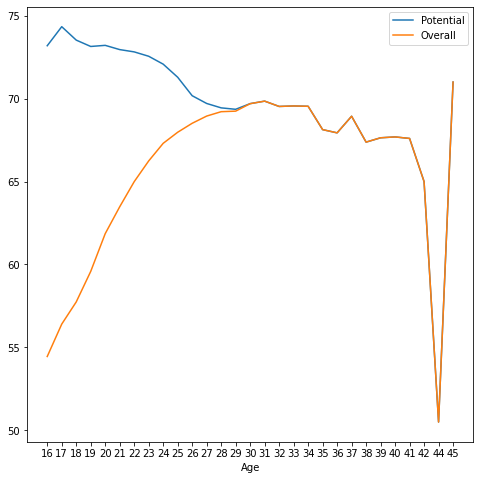

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Select ,aggregate and turn to pandas

avg_potential_age = df.groupby('Age').agg(F.mean('Potential').alias('Avg')).orderBy('Age',ascending=True).toPandas()
avg_overall_age = df.groupby('Age').agg(F.mean('Overall').alias('Avg')).orderBy('Age',ascending=True).toPandas()

#plot
plt.figure(figsize =(8,8))
plt.plot(avg_potential_age['Age'],avg_potential_age['Avg'],label='Potential')
plt.plot(avg_overall_age['Age'],avg_overall_age['Avg'],label='Overall')
plt.xlabel('Age')
plt.legend()



## Part 2 - Unsupervised Learning: Kmeans

<a id="kmeans"></a>
***

In this part, you are required to build a Kmeans clustering for exploring the player segmentation. 


### 2.1 Data Preparation

*Remind: You must only use **pyspark** to complete the following data processing and model building. Otherwise, you lose all marks.*


****

<div class="alert alert-block alert-info">

**Code**: 
    You will need to remove the Goal Keepers (Position = 'GK') and use the position attribute, ID attribute (for later processing) and skill-set attributes (Height(CM),
Weight(KG),
Crossing,
Finishing,
HeadingAccuracy,
ShortPassing,
Volleys,
Dribbling,
Curve,
FKAccuracy,
LongPassing,
BallControl,
Acceleration,
SprintSpeed,
Agility,
Reactions,
Balance,
ShotPower,
Jumping,
Stamina,
Strength,
LongShots,
Aggression,
Interceptions,
Positioning,
Vision,
Penalties,
Composure,
Marking,
StandingTackle,
SlidingTackle) 

</div>



In [0]:


# Remove positiong GK
df = df.filter(df['Position'] != 'GK')

#Select relevant features

df = df.select(['Position', 'ID','Height(CM)', 'Weight(KG)', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
                'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl','Acceleration', 'SprintSpeed', 'Agility',
                'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning',
               'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle'])



To make the later stage easier, we define the position group by using the position feature (attributes on Position).
- DEF = [LB,LWB,RB,LCB,RCB,CB,RWB] ,
- FWD = [RF,LF,LW,RS,RW,LS,CF,ST] ,
- MID = [LCM,LM,RDM,CAM,RAM,RCM,CM,CDM,RM,LAM,LDM]

****

<div class="alert alert-block alert-info">

**Code**: 
    You are required to create a new column called Position_Group with only DEF/FWD/MID in the dataframe you created in previous question

</div>

</div>

In [0]:
from pyspark.sql.functions import when,col

# Your code to complete
DEF = ['LB','LWB','RB','LCB','RCB','CB','RWB']
FWD = ['RF','LF','LW','RS','RW','LS','CF','ST']
MID = ['LCM','LM','RDM','CAM','RAM','RCM','CM','CDM','RM','LAM','LDM'] 

#Define function
def check(s):
    
    if s in DEF:
        
        return 'DEF'
    if s in FWD:
        return 'FWD'
    if s in MID:
        return 'MID'

#Create user defined function in pyspark
udfcheck = F.udf(check)

# create a new variable df_kmeans_new with a new column Position_Group, ..
df_kmeans_new = df.withColumn("Position_Group", udfcheck("Position"))

Now, we remove the Position_Group and Position to create the feature for Kmeans




In [0]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler

#Features columns

FEATURES_COL = ['Height(CM)', 'Weight(KG)', 
                      'Crossing', 'Finishing', 'HeadingAccuracy', 
                      'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                      'FKAccuracy', 'LongPassing', 'BallControl', 
                      'Acceleration', 'SprintSpeed', 'Agility', 
                      'Reactions', 'Balance', 'ShotPower', 'Jumping', 
                      'Stamina', 'Strength', 'LongShots', 'Aggression', 
                      'Interceptions', 'Positioning', 'Vision', 'Penalties', 
                      'Composure', 'Marking', 'StandingTackle', 'SlidingTackle']

#Change column data type to float
for col_name in FEATURES_COL:
    df_kmeans_new = df_kmeans_new.withColumn(col_name, col(col_name).cast('float'))


vecAssembler = VectorAssembler(inputCols=FEATURES_COL, outputCol="features")
df_kmeans_ = vecAssembler.transform(df_kmeans_new).select('ID','features')
#Show first three rows
df_kmeans_.show(3)

+------+--------------------+
|    ID|            features|
+------+--------------------+
|158023|[173.735992431640...|
| 20801|[188.975997924804...|
|190871|[179.832000732421...|
+------+--------------------+
only showing top 3 rows



Now in order to evaluate your Kmeans Model, please plot the elbow plot


<div class="alert alert-block alert-info">

**Code**: 
    You are required to plot the elbow plot, with a varying K from 2 to 20.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **2.1** In your report with proper section title  '2.1', Please include the elbow plot. 

</div>
</div>



In [0]:
#Create numpy array with 20 zeros
cost = np.zeros(20)

for k in range(2,20):# range of k(clusters)
  kmeans=KMeans()\
  .setK(k)\
  .setFeaturesCol('features')\#set the features column
  .setPredictionCol('Cluster')# set the prediction column
  model = kmeans.fit(df_kmeans_)#Fit model to the data
  cost[k] = model.computeCost(df_kmeans_)# Compute cost






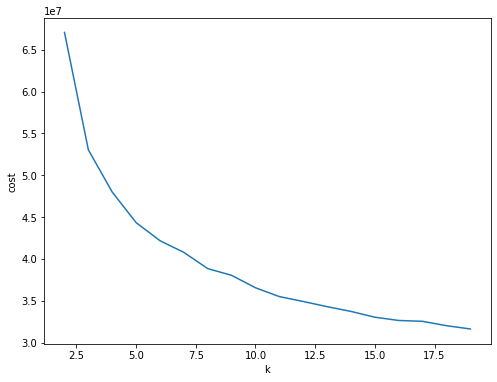

In [0]:
#Create a subplot of one row and column of size 8 by 6
fig, ax = plt.subplots(1,1, figsize =(8,6))

#Label x axis
ax.set_xlabel('k')
#Label y axis
ax.set_ylabel('cost')

# plot elbow curve
ax.plot(range(2,20),cost[2:20])
plt.show()


### 2.2 K-Means

Could you tell out the optimized K value? 




****

<div class="alert alert-block alert-info">

**Code**: 
    You are required to choose a K value as 8 and then summarize each cluster with the count on each Position_Group.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **2.2** In your report with proper section title  '2.2', Please summarize the following:     
    <ol>
        <li> What you could find from those clusters (by cluster central point)? </li>
        <li> Is there relationship between Position_Group and a particular Cluster?</li>
    </ol>

</div>
</div>




In [0]:
#Choose a K value of 8
k = 8

# Create model with 8 clusters
kmeans = KMeans()\
  .setK(k)\
  .setFeaturesCol('features')\
  .setPredictionCol('Cluster')

#Fit model
kmeansModel = kmeans.fit(df_kmeans_) 
#Make  prediction using kmeans model
pred=kmeansModel.transform(df_kmeans_).select('ID','Cluster').collect()



In [0]:
from pyspark.sql import SQLContext


sqlContext = SQLContext(spark)
#create dataframe using SQLContext
df_kmeans_pred_ = sqlContext.createDataFrame(pred)

#Join pred and df_kmeans_new using column ID and create dataframe df_kmeans_pred_
df_kmeans_pred_ = df_kmeans_new.join(df_kmeans_pred_,on='ID',how='inner')

#summarize each cluster with the count on each Position_Group.
df_kmeans_pred_.crosstab('Cluster','Position_Group').show()

+----------------------+----+----+----+
|Cluster_Position_Group| DEF| FWD| MID|
+----------------------+----+----+----+
|                     0|1032|  46|1964|
|                     5|1705|  34|1421|
|                     1|1429|   4| 228|
|                     6|  12| 511|1521|
|                     2|   4| 596| 856|
|                     7|1678|   1| 119|
|                     3|   5| 900| 597|
|                     4|   1|1326| 132|
+----------------------+----+----+----+



## Part 3 - Supervised Learning: Classification on Position_Group

<a id="classification"></a>
***

In last part, you use the player's skill set values to segment the players into 8 clusters. Now we want to see whether we could accurately predict the position_group of the player.

*Remind: You must only use **PySpark** to complete the following data processing and model building. Otherwise, you lose all marks.*


### 3.1 Data Preparation

We remove the feature of position and only use the skill set features and the cluster results from Kmeans as the input (you need to create a column for your cluster results and name it as Cluster) for the model. Your target for classification is "Position_Group".

In [0]:
#remove feature position

FEATURES_COL_ = ['Height(CM)', 'Weight(KG)', 
                      'Crossing', 'Finishing', 'HeadingAccuracy', 
                      'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                      'FKAccuracy', 'LongPassing', 'BallControl', 
                      'Acceleration', 'SprintSpeed', 'Agility', 
                      'Reactions', 'Balance', 'ShotPower', 'Jumping', 
                      'Stamina', 'Strength', 'LongShots', 'Aggression', 
                      'Interceptions', 'Positioning', 'Vision', 'Penalties', 
                      'Composure', 'Marking', 'StandingTackle', 'SlidingTackle','Cluster']

#Create vector assenmbler
vecAssembler_ = VectorAssembler(inputCols=FEATURES_COL_, outputCol="features")

#Create the dataframe class
df_class_ = vecAssembler_.transform(df_kmeans_pred_).select('features','Position_Group')

#Show top 3 rows
df_class_.show(3)


+--------------------+--------------+
|            features|Position_Group|
+--------------------+--------------+
|[173.735992431640...|           FWD|
|[188.975997924804...|           FWD|
|[179.832000732421...|           FWD|
+--------------------+--------------+
only showing top 3 rows



In many data science modelling work, feature scaling is very important.
In here, we use standard scaling on the features.

In [0]:
from pyspark.ml.feature import StandardScaler


# Standardize the features column
standardscaler=StandardScaler().setInputCol("features").setOutputCol("Scaled_features")
#Fit scaler to data
raw_data=standardscaler.fit(df_class_).transform(df_class_)

#Show first five rows of scaled features
raw_data.select("features","Scaled_features",'Position_Group').show(5)

+--------------------+--------------------+--------------+
|            features|     Scaled_features|Position_Group|
+--------------------+--------------------+--------------+
|[173.735992431640...|[12.9261366722264...|           FWD|
|[188.975997924804...|[14.0600087682323...|           FWD|
|[179.832000732421...|[13.3796859647366...|           FWD|
|[155.752807617187...|[11.5881692110224...|           MID|
|[176.783996582031...|[13.1529113184815...|           FWD|
+--------------------+--------------------+--------------+
only showing top 5 rows



In Spark, you could not use string as Target data type, Please encode the Position_Group column by using following encoding: 

FWD = 0
DEF = 1
MID = 2

*Hint: Data type after encoding should be numeric.*

In [0]:
#Encode Position_Group

raw_data_ = raw_data.withColumn('Target',when(col("Position_Group") == "DEF", 1)
      .when(col("Position_Group")== "FWD", 0)
      .otherwise(2))

### 3.2 Training Test Evaluation

We remove the feature of position and use all other skill set features and the cluster results as the input for the model. The target for classification is "Position_Group".

Now, we split your data into train/Test, and evaluate one model's performance.

In [0]:
# Split dataset 70% train and 30% test

train, test = raw_data_.randomSplit([0.7, 0.3], seed=12)

In [0]:
from pyspark.ml.classification import LogisticRegression

#Create logistic regression model
lr = LogisticRegression(labelCol="Target", featuresCol="Scaled_features",maxIter=10)

#Fit model to training data
model=lr.fit(train)

predict_train=model.transform(train)
predict_test=model.transform(test)

#Select columns and show the first ten rows
predict_test.select("Target","prediction").show(10)

+------+----------+
|Target|prediction|
+------+----------+
|     2|       2.0|
|     2|       2.0|
|     0|       2.0|
|     2|       2.0|
|     2|       2.0|
|     2|       2.0|
|     2|       2.0|
|     1|       2.0|
|     0|       0.0|
|     2|       2.0|
+------+----------+
only showing top 10 rows




****


<div class="alert alert-block alert-info">

**Code**: 
    You are required to evaluate the model by using confusion matrix. Please also print out your model's Precision, Recall and F1 score.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **3.2** In your report with proper section title  '3.2', Please summarize the following:     
    <ol>
        <li> The confusion matrix </li>
        <li> The Precision, Recall and F1 score</li>
    </ol>
</div>
</div>




In [0]:
from sklearn.metrics import confusion_matrix



#Ground truth target values
y_true = predict_test.select(['Target']).collect()
#Estimated tarhet as returned by classifier
y_pred = predict_test.select(['prediction']).collect()

#Show the confusion matrix
print(confusion_matrix(y_true, y_pred,labels=[0,1,2]))


array([[ 828,    4,  185],
       [   2, 1434,  281],
       [ 223,  228, 1631]])

In [0]:
from sklearn.metrics import classification_report

# Show the classification report

print(classification_report(y_true, y_pred))



              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1017
           1       0.86      0.84      0.85      1717
           2       0.78      0.78      0.78      2082

    accuracy                           0.81      4816
   macro avg       0.81      0.81      0.81      4816
weighted avg       0.81      0.81      0.81      4816



### 3.3 K-fold Cross-Validation

We surely missed something during the modelling work -- Hyper-parameter tuning! We can use K-fold cross validation to find out the best hyper-parameter set.

****


<div class="alert alert-block alert-info">

**Code**: 
    Please implement K-fold cross validation for three (any three) classification models.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **3.3** In your report with proper section title  '3.3', Please summarize the following:     
    <ol>
        <li> Your code design and running results </li>
        <li> Your findings on hyper-parameters based on this cross-validation results</li>
        <li> Any difficulties you had </li>
        <li> Any other possible tasks we could do on this dataset </li>
    </ol>
<b>Remind: fail to list the reference will lead a penalty and possibly plagiarism</b>    
</div>
</div>



In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Hypeparameter tuning for logistic regression

modelEvaluator=MulticlassClassificationEvaluator(labelCol='Target')
pipeline = Pipeline(stages=[lr]) 
#Create parameter grid for logistic regression

paramGrid = ParamGridBuilder()\
    .addGrid(lr.aggregationDepth,[2,5])\
    .addGrid(lr.elasticNetParam,[0.0, 0.2])\
    .addGrid(lr.fitIntercept,[False, True])\
    .addGrid(lr.maxIter,[10,15,20])\
    .addGrid(lr.regParam,[0.01,0.02]) \
    .build()
#Cross validate using 3 folds
cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, evaluator=modelEvaluator, numFolds=3)    

#Fit model to training data
cvModel = cv.fit(train)

# print the best model parameters from all the parameters
bestModel = cvModel.bestModel
print('Best Param (regParam): ', bestModel._java_obj.getRegParam())
print('Best Param (regMaxIter): ', bestModel._java_obj.getMaxIter())
print('Best Param (reg FitIntercept): ', bestModel._java_obj.getFitIntercept())
print('Best Param (reg ElasticNetParam): ', bestModel._java_obj.getElasticNetParam())
print('Best Param (reg AggregationDepth): ', bestModel._java_obj.getAggregationDepth())


Best Param (regParam):  0.01
Best Param (regMaxIter):  20
Best Param (reg FitIntercept):  True
Best Param (reg ElasticNetParam):  0.0
Best Param (reg AggregationDepth):  2


In [0]:
# Hyperparameter tuning for random forest
rf = RandomForestClassifier(labelCol="Target", featuresCol="Scaled_features")
pipeline = Pipeline(stages=[rf])
#Create parameter grid for random forest
paramGrid = ParamGridBuilder()\
    .addGrid(rf.maxBins,[5,10,15])\
    .addGrid(rf.maxDepth,[2,4,6,8])\
    .addGrid(rf.impurity,['gini', 'entropy'])\
    .build()
#Cross validate using 3 folds    
random_forest_cv = CrossValidator(estimator=rf, estimatorParamMaps=paramGrid, evaluator=modelEvaluator, numFolds=3)    
#Fit model to training data
cvModel = random_forest_cv.fit(train)
bestModel = cvModel.bestModel
# print the best model parameters from all the parameters
print('Best Param (MaxBins): ', bestModel._java_obj.getMaxBins())
print('Best Param (MaxDepth): ', bestModel._java_obj.getMaxDepth())
print('Best Param (Impurity): ', bestModel._java_obj.getImpurity())


Best Param (MaxBins):  15
Best Param (MaxDepth):  8
Best Param (Impurity):  entropy


In [0]:
#Hyperparameter tuning for Decision tree

from pyspark.ml.classification import DecisionTreeClassifier

dt = DecisionTreeClassifier(labelCol="Target",featuresCol="Scaled_features")
pipeline = Pipeline(stages=[dt])
#Create parameter grid for gradient boosted trees
paramGrid = ParamGridBuilder()\
    .addGrid(dt.maxBins,[5,10,15])\
    .addGrid(dt.maxDepth,[2,4,6,8])\
    .build()
#Cross validate using 3 folds 

dt_cv = CrossValidator(estimator=dt, estimatorParamMaps=paramGrid, evaluator=modelEvaluator, numFolds=3)  
#Fit model to training data  
cvModel = dt_cv.fit(train)
bestModel = cvModel.bestModel

print('Best Param (maxdepth): ', bestModel._java_obj.getMaxDepth())
print('Best Param (maxbins): ', bestModel._java_obj.getMaxBins())





Best Param (maxdepth):  8
Best Param (maxbins):  10
